In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
#reload
df = pd.read_excel("wolves_standard_stats_scouted.xlsx")
df

,Unnamed: 0,Player,Nation,S,Age,MP,Starts,Min,90s,Gls,...,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,PrgC90,PrgP90,PrgR90
0,0,Rayan Aït-Nouri,dz ALG,DF,23.0,37.0,37.0,3109.0,34.5,4.0,...,0.12,0.32,0.08,0.16,0.24,0.08,0.24,2.579710,3.130435,5.101449
1,1,João Gomes,br BRA,MF,23.0,36.0,35.0,2974.0,33.0,3.0,...,0.09,0.12,0.09,0.04,0.12,0.09,0.12,1.787879,5.000000,2.303030
2,2,Nélson Semedo,pt POR,DF,30.0,34.0,32.0,2886.0,32.1,0.0,...,0.00,0.12,0.03,0.09,0.12,0.03,0.12,2.087227,2.492212,3.707165
3,3,André,br BRA,MF,23.0,33.0,31.0,2472.0,27.5,0.0,...,0.00,0.00,0.02,0.03,0.05,0.02,0.05,0.363636,3.963636,0.400000
4,4,Toti Gomes,pt POR,DF,25.0,31.0,30.0,2614.0,29.0,0.0,...,0.00,0.03,0.03,0.03,0.06,0.03,0.06,0.931034,2.965517,0.620690
5,5,Jørgen Strand Larsen,no NOR,FW,24.0,35.0,30.0,2587.0,28.7,14.0,...,0.49,0.63,0.36,0.10,0.46,0.36,0.46,0.592334,1.010453,3.902439
6,6,José Sá,pt POR,GK,31.0,29.0,29.0,2609.0,29.0,0.0,...,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.000000,0.068966,0.000000
7,7,Matheus Cunha,br BRA,"MF,FW",25.0,33.0,29.0,2597.0,28.9,15.0,...,0.52,0.73,0.30,0.27,0.57,0.30,0.57,3.875433,4.982699,5.570934
8,8,Matt Doherty,ie IRL,DF,32.0,30.0,25.0,2109.0,23.4,2.0,...,0.09,0.13,0.04,0.07,0.11,0.04,0.11,1.239316,3.376068,1.752137
9,9,Jean-Ricner Bellegarde,fr FRA,"MF,FW",26.0,35.0,20.0,1677.0,18.6,2.0,...,0.11,0.48,0.08,0.20,0.29,0.08,0.29,2.795699,2.311828,4.784946


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Patch

plt.style.use('dark_background')
df = pd.read_excel("wolves_standard_stats_scouted.xlsx")

if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join([str(x) for x in tup]).strip() for tup in df.columns]

player_cols = [c for c in df.columns if 'player' in c.lower()]
player_col = player_cols[0] if player_cols else 'Player'
df = df[~df[player_col].isin(['Squad Total', 'Opponent Total'])]
if 'Min' in df.columns:
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df = df[df['Min'] >= 500]
else:
    raise ValueError("Missing 'Min' column for minutes played.")
if 'S' in df.columns:
    df['PrimaryRole'] = df['S'].str.split(',').str[0].str.upper().str.strip()
else:
    raise ValueError("Missing 'S' column for position info.")
position_colors = {
    'GK': 'green',
    'DF': 'lightblue',
    'MF': 'orange',
    'FW': 'red'
}

def scatter_plot(df, x_col, y_col, label_col, title):
    plt.figure(figsize=(8, 6))
    texts = []

    for pos, color in position_colors.items():
        sub_df = df[df['PrimaryRole'] == pos]
        plt.scatter(sub_df[x_col], sub_df[y_col], label=pos, color=color, alpha=0.8, s=40)
        for _, row in sub_df.iterrows():
            offset_x, offset_y = 0.02, 0.02
            label_color = 'white'
            fontweight = 'normal'
            bbox = None
            if row['Nation'] == 'zz':
                offset_x = 0
                offset_y = 0.05
                label_color = 'lightgreen'
                fontweight = 'bold'
                bbox = dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1)
        
            texts.append(
                plt.text(row[x_col] + offset_x, row[y_col] + offset_y, str(row[label_col]),
                         fontsize=8, color=label_color, fontweight=fontweight, bbox=bbox)
            )
    rotation_df = df[(df['Min'] >= 500) & (df['Min'] < 1000)]
    plt.scatter(rotation_df[x_col], rotation_df[y_col],
                facecolors=rotation_df['PrimaryRole'].map(position_colors),
                edgecolors='white', linewidths=1.5, s=60, alpha=1, label='_nolegend_')

    scouted_df = df[df['Nation'] == 'zz']
    plt.scatter(scouted_df[x_col], scouted_df[y_col],
                facecolors='lightgreen', linewidths=1.5, s=60, alpha=1, label='_nolegend_')
    
    legend_elements = [
        Patch(color='green', label='GK'),
        Patch(color='lightblue', label='DF'),
        Patch(color='orange', label='MF'),
        Patch(color='red', label='FW'),
        Patch(facecolor='gray', edgecolor='white', linewidth=1.5, label='Rotational'),
        Patch(facecolor='lightgreen', label='Scouted')
    ]

    plt.legend(handles=legend_elements, title='Primary Position', loc='upper left')

    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
    plt.tight_layout()
    plt.show()

cols_needed = ['PrgC90', 'PrgP90', 'PrgR90', 'Min', 'S']
for col in cols_needed:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

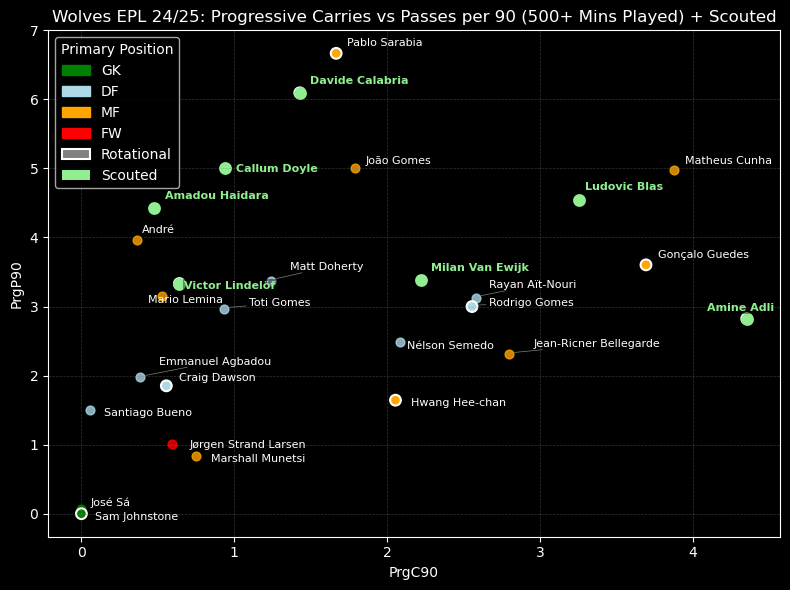

In [3]:
scatter_plot(df, 'PrgC90', 'PrgP90', player_col, 'Wolves EPL 24/25: Progressive Carries vs Passes per 90 (500+ Mins Played) + Scouted')

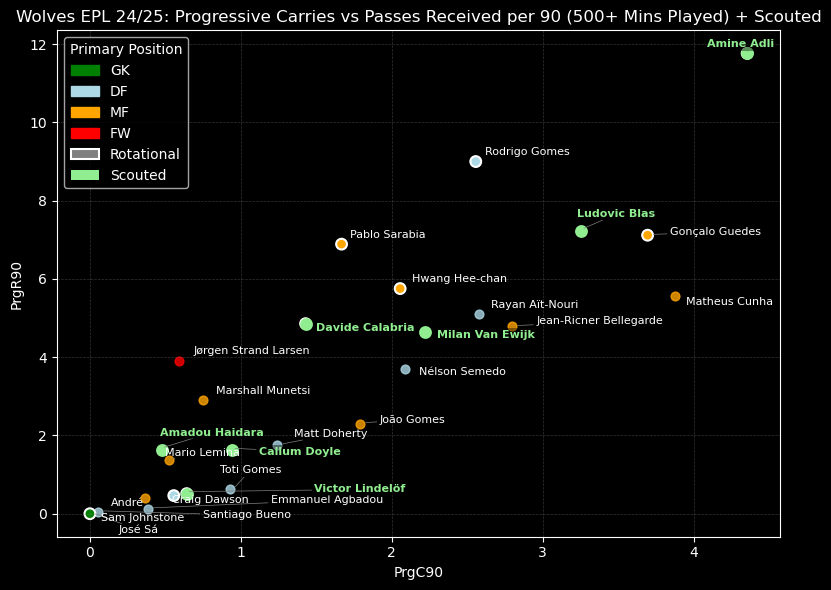

In [4]:
scatter_plot(df, 'PrgC90', 'PrgR90', player_col, 'Wolves EPL 24/25: Progressive Carries vs Passes Received per 90 (500+ Mins Played) + Scouted')

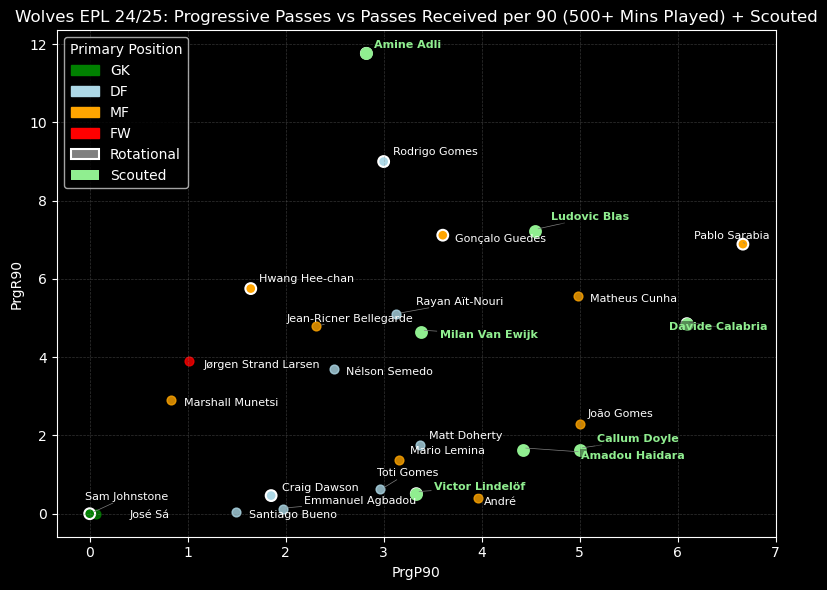

In [5]:
scatter_plot(df, 'PrgP90', 'PrgR90', player_col, 'Wolves EPL 24/25: Progressive Passes vs Passes Received per 90 (500+ Mins Played) + Scouted')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.style.use('dark_background')
df = pd.read_excel("wolves_standard_stats_scouted.xlsx")
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join([str(x) for x in tup]).strip() for tup in df.columns]

player_cols = [c for c in df.columns if 'player' in c.lower()]
player_col = player_cols[0] if player_cols else 'Player'

df = df[~df[player_col].isin(['Squad Total', 'Opponent Total'])]

if 'Min' in df.columns:
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df = df[df['Min'] >= 500]
else:
    raise ValueError("Missing 'Min' column for minutes played.")

if 'S' in df.columns:
    df['PrimaryRole'] = df['S'].str.split(',').str[0].str.upper().str.strip()
else:
    raise ValueError("Missing 'S' column for position info.")

position_colors = {
    'GK': 'limegreen',
    'DF': 'deepskyblue',
    'MF': 'orange',
    'FW': 'red'
}

def scatter_plot(df, x_col, y_col, label_col, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    texts = []

    for pos, color in position_colors.items():
        sub_df = df[(df['PrimaryRole'] == pos) & (df['Nation'] != 'zz')]
        ax.scatter(sub_df[x_col], sub_df[y_col], label=pos, color=color, alpha=0.8, s=40)
        for _, row in sub_df.iterrows():
            texts.append(ax.text(row[x_col], row[y_col], str(row[label_col]), fontsize=8, color='white'))

    scouted_df = df[df['Nation'] == 'zz']
    ax.scatter(scouted_df[x_col], scouted_df[y_col], facecolors='lightgreen', s=60, label='Scouted', alpha=1)

    for _, row in scouted_df.iterrows():
        texts.append(ax.text(row[x_col], row[y_col] + 0.02, str(row[label_col]), fontsize=8, color='lightgreen', fontweight='bold'))

    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='lightgray', lw=0.5))

    ax.set_facecolor('#121212')
    ax.set_xlabel(x_col, color='white')
    ax.set_ylabel(y_col, color='white')
    ax.set_title(title, color='white')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(color='limegreen', label='GK'),
        Patch(color='deepskyblue', label='DF'),
        Patch(color='orange', label='MF'),
        Patch(color='red', label='FW'),
        Patch(facecolor='lightgreen', label='Scouted')
    ]
    ax.legend(handles=legend_elements, title='Primary Position', loc='upper left',
              facecolor='#1e1e1e', edgecolor='white', labelcolor='white', title_fontsize=10)

    ax.grid(True, linestyle='--', color='gray', alpha=0.4)
    plt.tight_layout()
    plt.show()

cols_needed = ['PrgC', 'PrgP', 'PrgR', 'Min', 'S']
for col in cols_needed:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

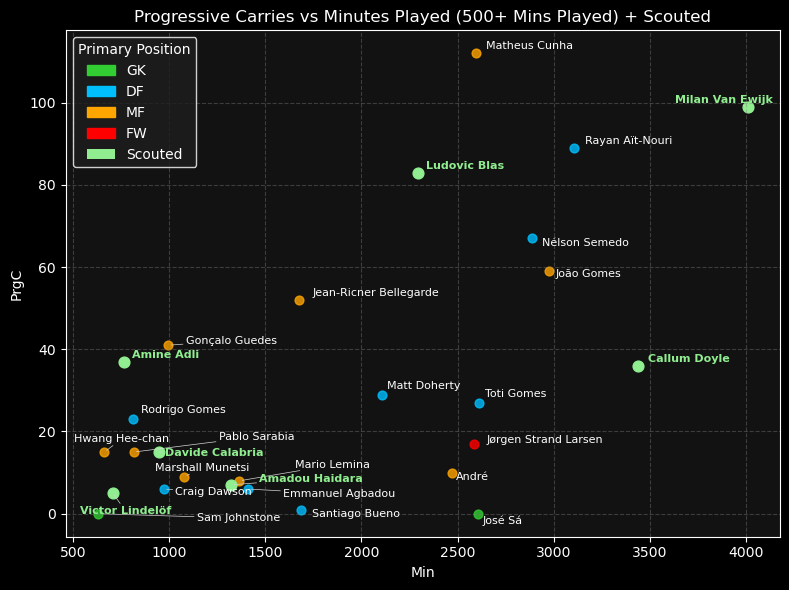

In [7]:
scatter_plot(df, 'Min', 'PrgC', player_col, 'Progressive Carries vs Minutes Played (500+ Mins Played) + Scouted')

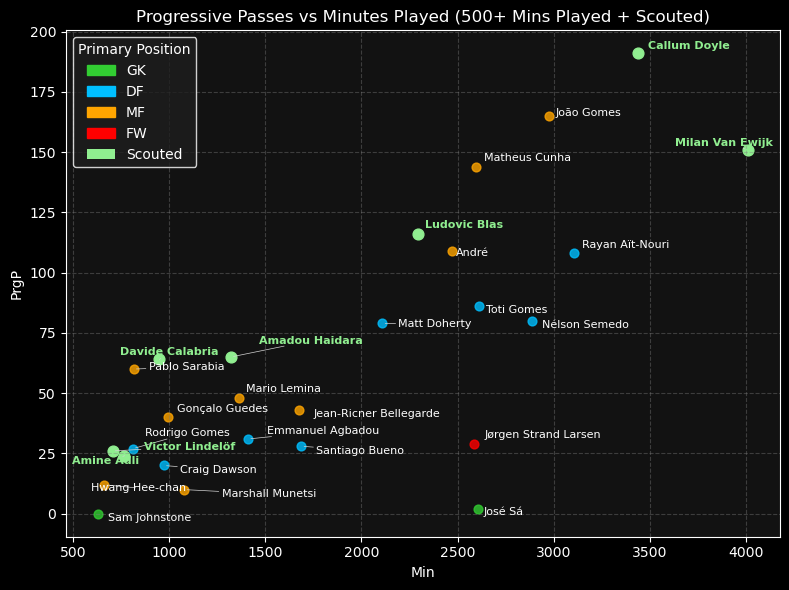

In [8]:
scatter_plot(df, 'Min', 'PrgP', player_col, 'Progressive Passes vs Minutes Played (500+ Mins Played + Scouted)')

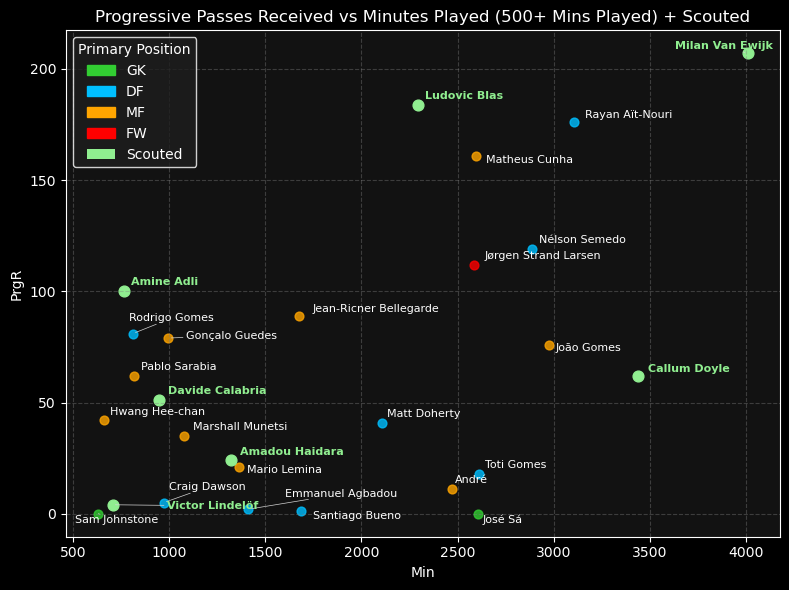

In [9]:
scatter_plot(df, 'Min', 'PrgR', player_col, 'Progressive Passes Received vs Minutes Played (500+ Mins Played) + Scouted')